In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes 

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
# Save the input and target variables
#print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]


In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return(model)
model = get_model()

In [8]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model

model.compile(oprimizer='adam', loss='mse', metrics=['mae'])


In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9861 - mae: 0.8521 - val_loss: 0.7935 - val_mae: 0.7539
Epoch 2/100
337/337 - 0s - loss: 0.6922 - mae: 0.7024 - val_loss: 0.5849 - val_mae: 0.6003
Epoch 3/100
337/337 - 0s - loss: 0.5916 - mae: 0.6490 - val_loss: 0.5605 - val_mae: 0.5538
Epoch 4/100
337/337 - 0s - loss: 0.5141 - mae: 0.5982 - val_loss: 0.5749 - val_mae: 0.5621
Epoch 5/100
337/337 - 0s - loss: 0.4764 - mae: 0.5764 - val_loss: 0.5517 - val_mae: 0.5517
Epoch 6/100
337/337 - 0s - loss: 0.4605 - mae: 0.5565 - val_loss: 0.7703 - val_mae: 0.7389
Epoch 7/100
337/337 - 0s - loss: 0.4952 - mae: 0.5912 - val_loss: 0.8240 - val_mae: 0.6668
Epoch 8/100
337/337 - 0s - loss: 0.4789 - mae: 0.5627 - val_loss: 0.5625 - val_mae: 0.5491
Epoch 9/100
337/337 - 0s - loss: 0.4419 - mae: 0.5393 - val_loss: 0.5905 - val_mae: 0.5490
Epoch 10/100
337/337 - 0s - loss: 0.4353 - mae: 0.5327 - val_loss: 0.6753 - val_mae: 0.6037
Epoch 11/100
337/337 - 0s - loss: 0.5149 - m

In [11]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.7336 - mae: 0.6691


[0.7819557428359986, 0.6691007]

#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

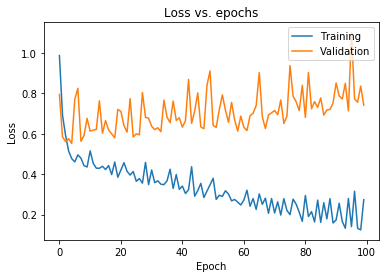

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [18]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0136 - mae: 0.8569 - val_loss: 0.9659 - val_mae: 0.8394
Epoch 2/100
337/337 - 0s - loss: 1.0065 - mae: 0.8565 - val_loss: 0.9572 - val_mae: 0.8366
Epoch 3/100
337/337 - 0s - loss: 0.9846 - mae: 0.8504 - val_loss: 0.9059 - val_mae: 0.8119
Epoch 4/100
337/337 - 0s - loss: 0.9198 - mae: 0.8224 - val_loss: 0.7885 - val_mae: 0.7474
Epoch 5/100
337/337 - 0s - loss: 0.7733 - mae: 0.7550 - val_loss: 0.6216 - val_mae: 0.6265
Epoch 6/100
337/337 - 0s - loss: 0.6528 - mae: 0.6882 - val_loss: 0.6139 - val_mae: 0.5705
Epoch 7/100
337/337 - 0s - loss: 0.6205 - mae: 0.6355 - val_loss: 0.5953 - val_mae: 0.5637
Epoch 8/100
337/337 - 0s - loss: 0.5944 - mae: 0.6499 - val_loss: 0.6029 - val_mae: 0.5973
Epoch 9/100
337/337 - 0s - loss: 0.6003 - mae: 0.6475 - val_loss: 0.6335 - val_mae: 0.6134
Epoch 10/100
337/337 - 0s - loss: 0.5550 - mae: 0.6258 - val_loss: 0.5990 - val_mae: 0.5732
Epoch 11/100
337/337 - 0s - loss: 0.5159 - m

In [19]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4864 - mae: 0.5813


[0.5492449588245816, 0.5813376]

#### Plot the learning curves

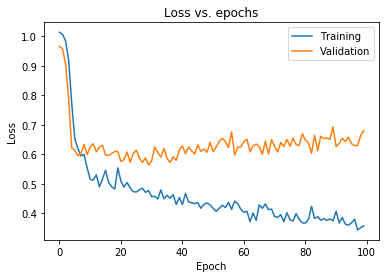

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [21]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training.....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(Self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
    
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
    
    def on_train_end(self, logs=None):
        print("Finished training")

In [22]:
from tensorflow.keras.callbacks import Callback
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting Testing.....")
        
    def on_test_batch_begin(Self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
    
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
    
    def on_test_end(self, logs=None):
        print("Finished Testing")

In [23]:
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting Predictions.....")
        
    def on_predict_batch_begin(Self, batch, logs=None):
        print(f"Predictions: Starting batch {batch}")
    
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Predictions: Finished batch {batch}")
    
    def on_predict_end(self, logs=None):
        print("Finished predicting")

In [24]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [25]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

#### Train the model with the callback

In [26]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])


Starting training.....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training


In [27]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting Testing.....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished Testing


0.9526961194144354

In [28]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting Predictions.....
Predictions: Starting batch 0
Predictions: Finished batch 0
Predictions: Starting batch 1
Predictions: Finished batch 1
Finished predicting


array([[ 0.03588578],
       [ 0.05638439],
       [ 0.02530061],
       [ 0.03828479],
       [-0.08132552],
       [-0.02473307],
       [-0.10197912],
       [-0.10381686],
       [-0.02753333],
       [ 0.00141064],
       [ 0.01318806],
       [-0.07542612],
       [ 0.00608474],
       [ 0.03526763],
       [-0.01149174],
       [-0.083369  ],
       [-0.07078885],
       [ 0.03809523],
       [-0.00788529],
       [-0.03523815],
       [-0.00690893],
       [-0.05032004],
       [-0.05234443],
       [-0.02720218],
       [-0.06887939],
       [ 0.0068557 ],
       [-0.07656615],
       [ 0.02965019],
       [-0.01506982],
       [-0.06594521],
       [-0.07760373],
       [-0.07404116],
       [-0.0242819 ],
       [-0.10583048],
       [-0.06592582],
       [-0.08002105],
       [-0.03147271],
       [ 0.01224775],
       [-0.00241393],
       [-0.09658805],
       [-0.10055888],
       [ 0.02843363],
       [ 0.00745514],
       [-0.10653213],
       [-0.08140218]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [42]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15,
                                       batch_size=64,
                                       verbose=False,
                                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [43]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6144


0.6202218810717265

In [41]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimzer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_targets, epochs=100,
                                   validation_split=0.15, batch_size=64, verbose=False,
                                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [44]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5913


0.5927419463793436

#### Plot the learning curves

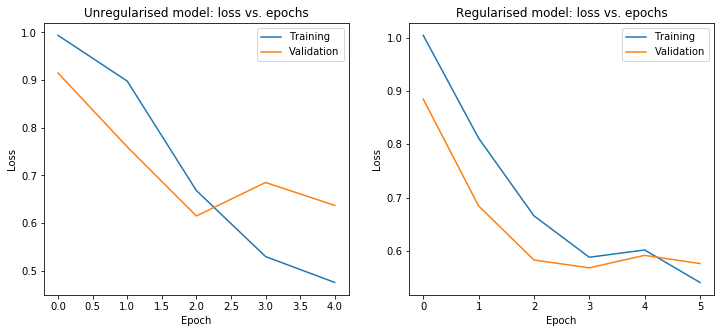

In [47]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()